In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pi = np.pi
j = np.arange(0,6)
x = (pi/10)*j # x_0,...,x_5
def g(x):
    return 1-np.cos(x)
def ab(start,end):
    xx = x[start:end+1]
    bmat = np.array([np.sum(g(xx)*xx), np.sum(g(xx))])
    Amat = np.array([[np.sum(xx**2), -np.sum(xx)],[np.sum(xx),-end+start-1]])
    return np.linalg.solve(Amat, bmat)

# solve for local minimizer
sol = []
for i in range(1,4): # i=0 raise a singular matrix
    a,b = ab(0,i)
    if a<0 and b/a>=x[i] and b/a<x[i+1]:
        sol.append([a,b])
    a,b = ab(i,5)
    if a>0 and b/a>=x[i-1] and b/a<x[i]:
        sol.append([a,b])
a,b = ab(0,5)
if (a>0)&(b<=0) or (a<0)&(b/a>=x[5]):
    sol.append([a,b])
    
print(sol)

[[0.8612890146501082, 0.37349154462542217]]


In [3]:
# the only local minimizer is the global minimizer
a_star,b_star = sol[0]

In [4]:
def R(x,a,b):
    return np.max(a*x-b,0)
def f(a,b,x):
    return (1/12)*np.sum((R(x,a,b)-g(x))**2)

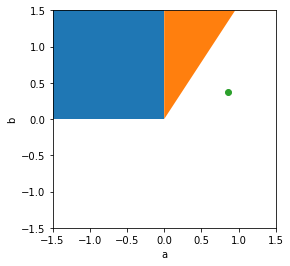

In [5]:
# plot the flat region and global minimizer
fig= plt.figure(figsize=(4,4))
aa1 = np.linspace(-1.5,0,20)
aa2 = np.linspace(0,1.5,20)
plt.fill_between(aa1,0,1.5)
plt.fill_between(aa2,aa2*x[5],1.5)
plt.scatter(a_star,b_star)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [6]:
def grad_fa(a,b,x=x):
    res = 0
    if a>0:
        for j0 in range(0,5):
            if b/a>=x[j0] and b/a<x[j0+1]:
                xx = x[j0+1:6]
                return (1/6)*(np.sum((a*xx-b-g(xx))*xx))
        if b<0: 
            xx = x[0:6]
            return (1/6)*(np.sum((a*xx-b-g(xx))*xx))
    elif a<0:
        for j0 in range(0,5):
            if b/a>=x[j0] and b/a<x[j0+1]:
                xx = x[0:j0+1]
                return (1/6)*(np.sum((a*xx-b-g(xx))*xx))
        if b/a>=x[5]: 
            xx = x[0:6]
            return (1/6)*(np.sum((a*xx-b-g(xx))*xx))
    return 0


def grad_fb(a,b,x=x):
    if a>0:
        for j0 in range(0,5):
            if b/a>=x[j0] and b/a<x[j0+1]:
                xx = x[j0+1:6]
                return (-1/6)*(np.sum(a*xx-b-g(xx)))
        if b<0: 
            xx = x[0:6]
            return (-1/6)*(np.sum(a*xx-b-g(xx)))
    elif a<0:
        for j0 in range(0,5):
            if b/a>=x[j0] and b/a<x[j0+1]:
                xx = x[0:j0+1]
                return (-1/6)*(np.sum(a*xx-b-g(xx)))
        if b/a>=x[5]: 
            xx = x[0:6]
            return (-1/6)*(np.sum(a*xx-b-g(xx)))
    return 0
def grad_f(a,b,x=x):
    return np.array([grad_fa(a,b,x),grad_fb(a,b,x)])

In [7]:
grad_f(1,0)

array([ 0.4108823 , -0.39487746])

In [10]:
## part b Gradient Descent
alpha_star = 1.51
def grad_des(alpha,a=1,b=0,tol = 1e-4,max_iter = 1e4):
    grad_a, grad_b = grad_f(a,b)
    iter_ = 0
    val = [grad_a**2 + grad_b**2]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('excess max iterations')
            return {"val":val, "ab":[a,b]}   

        a -= alpha* grad_a
        b -= alpha* grad_b
        grad_a, grad_b = grad_f(a,b)
        val.append(grad_a**2 + grad_b**2)
    return {"val":val, "ab":[a,b]}

out = grad_des(0.99*alpha_star)

excess max iterations


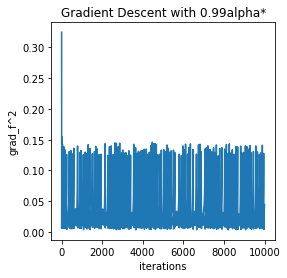

In [9]:
fig = plt.figure(figsize=(4,4))

plt.plot(range(len(out['val'])),out['val'])
plt.xlabel('iterations')
plt.ylabel('grad_f^2')
plt.title('Gradient Descent with 0.99alpha*')
plt.show()

excess max iterations


Text(0.5, 1.0, 'StocGrad Descent')

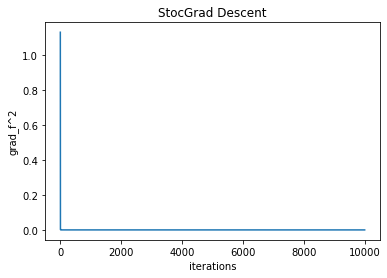

In [11]:
## part c Stochastic Gradient Descent
def Sgrad_f(a,b,x):
    # minibatch
    if a*x-b>=0:
        return [(a*x-b-g(x))*x,-a*x+b+g(x)]
    return [0,0]
def stoc_grad_des(a=1,b=0,tol=1e-4,max_iter = 10000):
    randn = np.random.randint(6,size=max_iter)
    iter_ = 0
    grad_a, grad_b = Sgrad_f(a,b,x[randn[iter_]])
    val = [grad_a**2 + grad_b**2]
    
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('excess max iterations')
            return {'val':val,'ab':[a,b]}  

        a -= grad_a/(2*iter_)
        b -= grad_b/(2*iter_)
        grad_a, grad_b = Sgrad_f(a,b,x[randn[iter_]])
        val.append(np.sum(grad_f(a,b)**2))
    return {'val':val,'ab':[a,b]}

outs = stoc_grad_des()
plt.close()

plt.plot(range(len(outs['val'])),outs['val'])
plt.xlabel('iterations')
plt.ylabel('grad_f^2')
plt.title('StocGrad Descent')

Problem 2

In [12]:
def Phi_a(x,y):
    return np.exp(-x)*(x+y**3)
x,y = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))
z = Phi_a(x,y)

In [13]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
z = z.reshape(-1,1)

In [14]:
def A(x,y):
    return (1-x)*(y**3)+x*(1+y**3)*np.exp(-1)+\
                (1-y)*x*(np.exp(-x)-np.exp(-1))+\
                y*((1+x)*np.exp(-x)-1+x-2*x*np.exp(-1))
def Axx(x,y):
    return np.exp(-x)*(x+y-2)

def Ayy(x,y):
    return 6*y*(1-x+x*np.exp(-1))

def Phi(x,y,v,wx,wy,u):
    return A(x,y) + x*(1-x)*y*(1-y)*N(x,y,v,wx,wy,u)

def f2(x,y):
    return np.exp(-x)*(x-2+y**3+6*y)

def Acti(x):
    return 1/(1+np.exp(-x))
def dActi(x):
    return np.exp(x)/(1+np.exp(x))**2  
def d2Acti(x):
    return -np.exp(x)*(np.exp(x)-1)/(1+np.exp(x))**3
def d3Acti(x):
    return np.exp(x)*(-4*np.exp(x)+np.exp(2*x)+1)/(1+np.exp(x))**4

def h(x,y): 
    return x*(1-x)*y*(1-y)
def hx(x,y):     # hy(x,y) = hx(y,x)
    return (1-2*x)*y*(1-y)
def hxx(x,y):    # hyy(x,y) = hxx(y,x)
    return -2*y*(1-y)
    

def F(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y) + hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    return np.mean(rk**2)/2 
    
def dF_u(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(np.sum(v*(dActi(wx*x+wy*y+u))))+\
          2*hx(x,y)*(np.sum(v*wx*(d2Acti(wx*x+wy*y+u)))) +\
          h(x,y)*((v*(wx**2)*(d3Acti(wx*x+wy*y+u))))+\
          hxx(y,x)*(np.sum(v*(dActi(wx*x+wy*y+u)))) + \
            2*hx(y,x)*(np.sum(v*wy*(d2Acti(wx*x+wy*y+u)))) + \
            h(x,y)*(np.sum(v*(wy**2)*(d3Acti(wx*x+wy*y+u)))) 
    return np.mean(rk*drk)

def dF_v(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(Acti(wx*x+wy*y+u))+\
         2*hx(x,y)*(np.sum(wx*(dActi(wx*x+wy*y+u)))) + \
        h(x,y)*(np.sum((wx**2)*(d2Acti(wx*x+wy*y+u))))+\
          hxx(y,x)*(np.sum((Acti(wx*x+wy*y+u)))) + \
        2*hx(y,x)*(np.sum(wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*(np.sum((wy**2)*(d2Acti(wx*x+wy*y+u)))) 
    return np.mean(rk*drk)

def dF_wx(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(np.sum(v*x*(dActi(wx*x+wy*y+u))))+\
         2*hx(x,y)*(v*(dActi(wx*x+wy*y+u))+ np.sum(x*wx*v*(d2Acti(wx*x+wy*y+u)))) + \
        h(x,y)*(2*wx*v*(d2Acti(wx*x+wy*y+u))+np.sum((wx**2)*x*v*(d3Acti(wx*x+wy*y+u))))+\
          hxx(y,x)*(np.sum(v*x*(dActi(wx*x+wy*y+u)))) + \
        2*hx(y,x)*(np.sum(x*v*wy*(d2Acti(wx*x+wy*y+u)))) + \
         h(x,y)*(np.sum(x*v*(wy**2)*(d3Acti(wx*x+wy*y+u))))
    return np.mean(rk*drk)

def dF_wy(v,wx,wy,u,x=x,y=y):
    rk = Axx(x,y)+hxx(x,y)*((v*(Acti(wx*x+wy*y+u))))+\
      2*hx(x,y)*((v*wx*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wx**2)*(d2Acti(wx*x+wy*y+u))))+\
        Ayy(x,y)+hxx(y,x)*((v*(Acti(wx*x+wy*y+u)))) + \
         2*hx(y,x)*((v*wy*(dActi(wx*x+wy*y+u)))) +\
         h(x,y)*((v*(wy**2)*(d2Acti(wx*x+wy*y+u)))) - f2(x,y)
    drk = hxx(x,y)*(np.sum(v*y*(dActi(wx*x+wy*y+u))))+\
         2*hx(x,y)*(v*wx*y*(d2Acti(wx*x+wy*y+u))) + \
        h(x,y)*(2*wx*wx*y*v*(d3Acti(wx*x+wy*y+u)))+\
          hxx(y,x)*(np.sum(v*y*(dActi(wx*x+wy*y+u)))) + \
        2*hx(y,x)*( v*(dActi(wx*x+wy*y+u))+np.sum(y*v*wy*(d2Acti(wx*x+wy*y+u)))) + \
         h(x,y)*( 2*wy*v*(d2Acti(wx*x+wy*y+u))+np.sum(y*v*(wy**2)*(d3Acti(wx*x+wy*y+u))))
    return np.mean(rk*drk)

In [15]:
def GD(alpha,tol = 1e-4,max_iter = 1e4):
    v,wx,wy,u=0.5,0.5,0.5,0.5
    grad_v, grad_wx, grad_wy, grad_u = dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)
    iter_ = 0
    val = [grad_v**2 + grad_wx**2+grad_u**2 + grad_wy**2]
    val2 = [F(v,wx,wy,u)]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('alpha=',alpha,', excess max iterations')
            return {"dF":val,"F":val2, "var":[v,wx,wy,u]}   

        u -= alpha* grad_u
        v -= alpha* grad_v
        wx -= alpha* grad_wy
        wy -= alpha* grad_wy
        
        grad_v, grad_wx, grad_wy, grad_u = dF_v(v,wx,wy,u),dF_wx(v,wx,wy,u),dF_wy(v,wx,wy,u),dF_u(v,wx,wy,u)
        val.append(grad_v**2 + grad_wx**2+grad_u**2 + grad_wy**2)
        val2.append(F(v,wx,wy,u))
    return {"dF":val,"F":val2, "var":[v,wx,wy,u]}


In [16]:
def SG(batch_size,redc_type,x=x,y=y,tol=1e-4,max_iter = 10000):
    if redc_type == 0:
        alpha = 1/(np.arange(1,max_iter+1))
    elif redc_type == 1:
        alpha = 1/(np.arange(1,max_iter+1))**(3/2)
    
    randn = np.random.randint(100,size=(max_iter,batch_size))
    v,wx,wy,u = 0.5,0.5,0.5,0.5
    iter_ = 0
    x_,y_ = x[randn[iter_]],y[randn[iter_]]
    grad_v, grad_wx, grad_wy, grad_u = dF_v(v,wx,wy,u,x_,y_),dF_wx(v,wx,wy,u,x_,y_),\
                                       dF_wy(v,wx,wy,u,x_,y_),dF_u(v,wx,wy,u,x_,y_)

    val = [grad_v**2 + grad_wx**2+grad_u**2 + grad_wy**2]
    val2 = [F(v,wx,wy,u)]
    while val[iter_] >= tol**2:
        iter_ += 1
        if iter_>= max_iter:
            print('batchsize=',batch_size, ', type=',redc_type,', excess max iterations')
            return {"dF":val,"F":val2, "var":[v,wx,wy,u]}   

        u -= alpha[iter_]* grad_u
        v -= alpha[iter_]* grad_v
        wx -= alpha[iter_]* grad_wy
        wy -= alpha[iter_]* grad_wy
        
        x_,y_ = x[randn[iter_]],y[randn[iter_]]
        grad_v, grad_wx, grad_wy, grad_u = dF_v(v,wx,wy,u,x_,y_),dF_wx(v,wx,wy,u,x_,y_),\
                                           dF_wy(v,wx,wy,u,x_,y_),dF_u(v,wx,wy,u,x_,y_)
        val.append(grad_v**2 + grad_wx**2+grad_u**2 + grad_wy**2)
        val2.append(F(v,wx,wy,u))
    return {"dF":val,"F":val2, "var":[v,wx,wy,u]} 

batchsize= 20 , type= 1 , excess max iterations


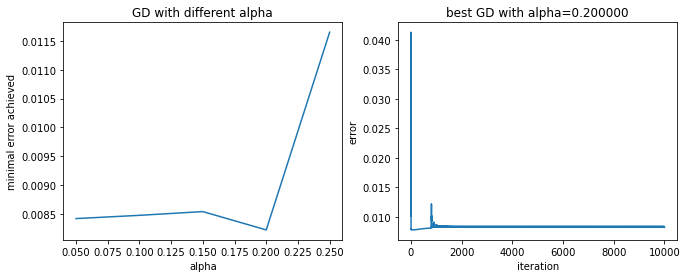

In [18]:
# experiment with GD
Fs = []
alpha = np.arange(0.05,0.3,0.05)
for alp in alpha:
    outgd = GD(alp)
    Fs.append(outgd['F'][-1])
Fs = np.array(Fs)
Fmin = np.min(Fs)
alpmin = alpha[np.argmin(Fs)]
outgd = GD(alpmin)
FF = outgd['F']
print(outgd['var'])

fig,ax = plt.subplots(1,2,figsize=(11,4))
ax[0].plot(alpha,Fs)
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('minimal error achieved')
ax[0].set_title('GD with different alpha')

ax[1].plot(range(len(FF)),FF)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('error')
ax[1].set_title('best GD with alpha=%f'%alpmin)

plt.show()

In [23]:
print(outgd['var'])
print(outgd['F'][-1])

[0.7945874900234373, 0.13959343106702912, 0.13959343106702912, 0.37983864377343873]
0.00821929136583989


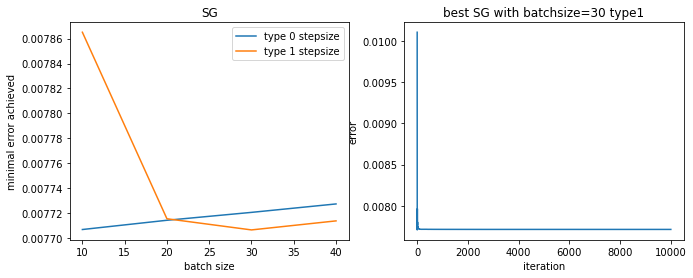

In [21]:
# experiment with SG
sFs = []
batchs = np.arange(10,50,10)
for bs in batchs:
    for types in [0,1]:
        outsgd = SG(bs,types)
        sFs.append([outsgd['F'][-1]])
sFs = np.array(sFs)
sFmin = np.min(sFs)
batchs_min = batchs[np.argmin(sFs)//2]
typemin = np.argmin(sFs)%2

outsgd = SG(batchs_min,typemin)
sF = outsgd['F']
print(outsgd['var'])
sFs = sFs.reshape(-1,2)

fig,ax = plt.subplots(1,2,figsize=(11,4))

ax[0].plot(batchs,sFs[:,0],label='type 0 stepsize')
ax[0].plot(batchs,sFs[:,1],label='type 1 stepsize')
ax[0].set_xlabel('batch size')
ax[0].set_ylabel('minimal error achieved')
ax[0].legend()
ax[0].set_title('SG')

ax[1].plot(range(len(sF)),sF)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('error')
ax[1].set_title('best SG with batchsize=%i'%batchs_min+' type%i'%typemin)

plt.show()

In [24]:
print(outsgd['var'])
print(outsgd['F'][-1])

[0.6293527683542801, 0.5190908897154666, 0.5190908897154666, 0.5484806336131787]
0.007713823406971468
